C:\Users\krish\AppData\Local\Temp\ipykernel_91088\224983077.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_place(place, tags={'building': True})
c:\Users\krish\anaconda3\envs\ox\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\krish\anaconda3\envs\ox\Lib\site-packages\jupyter_client\session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

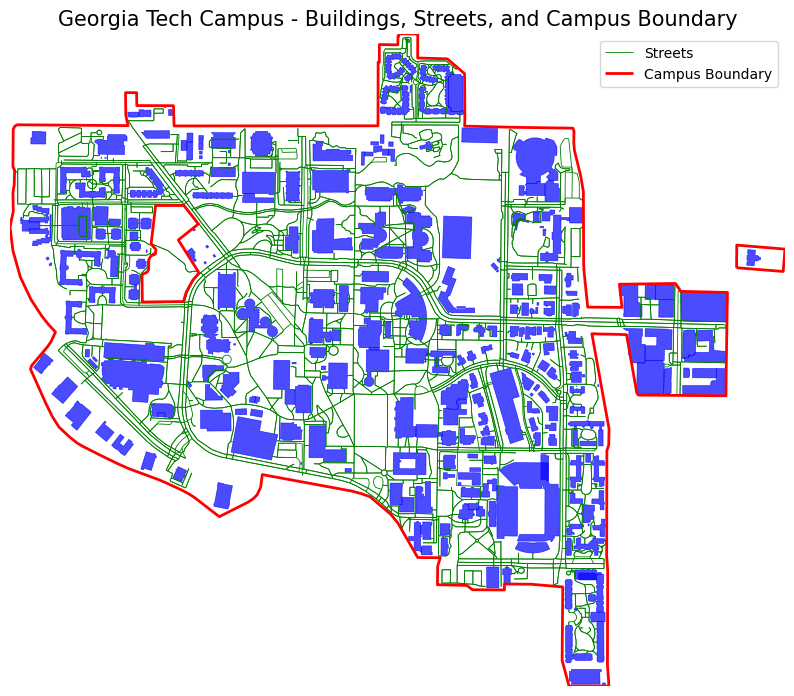

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the location - Georgia Tech, Atlanta, GA
place = "Georgia Institute of Technology, Atlanta, Georgia, USA"

# Download building footprints
buildings = ox.geometries_from_place(place, tags={'building': True})

# Download all streets (includes roads, sidewalks, paths, etc.)
streets = ox.graph_from_place(place, network_type='all')

# Get the campus boundary
campus_boundary = ox.geocode_to_gdf(place)

# Calculate the bounding box based on all geometries
minx, miny, maxx, maxy = campus_boundary.total_bounds

# Plot everything together
fig, ax = plt.subplots(figsize=(10, 10))

# Plot buildings
buildings.plot(ax=ax, color="blue", edgecolor="blue", linewidth=0.5, alpha=0.7, label="Buildings")

# Plot streets
ox.plot_graph(streets, ax=ax, show=False, close=False, edge_color="green", edge_linewidth=0.6, node_size=0)

# Plot the campus boundary
campus_boundary.boundary.plot(ax=ax, color="red", linewidth=2, label="Campus Boundary")

# Set axis limits to the full extent of the campus boundary
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


# Customize the plot
ax.set_title("Georgia Tech Campus - Buildings, Streets, and Campus Boundary", fontsize=15)
ax.axis("off")
plt.legend(["Streets", "Campus Boundary", "Buildings"], loc="upper right")
plt.show()
